In [5]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('django-packages.csv', sep=';')

categories = ['apps', 'frameworks']

removed_packages = [
    'django/django', # Django framework
]

df = df[~df['repo_id'].isin(removed_packages)]
df = df[(df['has_valid_repo_url']) & (df['has_valid_repo'])]
df = df[df['dp_category'].isin(categories)]
df = df[df['repo_last_modified'] >= '2018-01-01T00:00:00:000']

df.sort_values(by=['dp_usage_count'], ascending=False)

,dp_slug,dp_category,dp_grids,dp_usage_count,has_valid_repo_url,dp_repo_url,has_valid_repo,platform,repo_id,repo_stars,repo_last_modified,repo_forks,repo_open_issues,repo_topics
1068,django-debug-toolbar,apps,"this-site,developer-tools,data-tools",531,True,https://github.com/django-debug-toolbar/django...,True,github,django-debug-toolbar/django-debug-toolbar,6714.0,2021-11-09T10:21:46:000,950.0,88.0,NaN
2674,django-rest-framework,apps,"rest,api,this-site,django-rest-framework,drf-a...",344,True,https://github.com/tomchristie/django-rest-fra...,True,github,tomchristie/django-rest-framework,22187.0,2021-11-09T14:51:22:000,5932.0,259.0,"python,django,api,rest"
1292,django-extensions,apps,"this-site,developer-tools,fields,shells,cron",294,True,https://github.com/django-extensions/django-ex...,True,github,django-extensions/django-extensions,5552.0,2021-11-08T14:03:01:000,1057.0,123.0,NaN
2621,django-registration,apps,"authentication,security,django-registration,re...",241,True,https://github.com/ubernostrum/django-registra...,True,github,ubernostrum/django-registration,744.0,2021-11-09T11:17:39:000,236.0,0.0,"python,django,user-management,user-registration"
2263,django-oscar,frameworks,ecommerce,235,True,https://github.com/django-oscar/django-oscar,True,github,django-oscar/django-oscar,5119.0,2021-11-08T22:26:01:000,1881.0,128.0,"django,ecommerce,django-oscar,oscar"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2084,django-money-rates,apps,"fields,globalization",0,True,https://github.com/evonove/django-money-rates,True,github,evonove/django-money-rates,87.0,2021-10-24T09:38:46:000,61.0,12.0,NaN
2081,django-mollie-ideal,apps,payment-processing,0,True,https://github.com/peeb/django-mollie-ideal,True,github,peeb/django-mollie-ideal,16.0,2021-04-25T21:14:44:000,13.0,5.0,NaN
2072,django-modeltranslation-wagtail,apps,wagtail-internationalization-localization-trans,0,True,https://github.com/benjaoming/django-modeltran...,True,github,benjaoming/django-modeltranslation-wagtail,4.0,2021-11-08T21:59:19:000,0.0,0.0,NaN
2069,django-model-subscription,apps,NaN,0,True,https://github.com/tj-django/django-model-subs...,True,github,tj-django/django-model-subscription,15.0,2021-11-08T00:18:51:000,1.0,4.0,"django-model,bulk,django-model-subscribers,aut..."


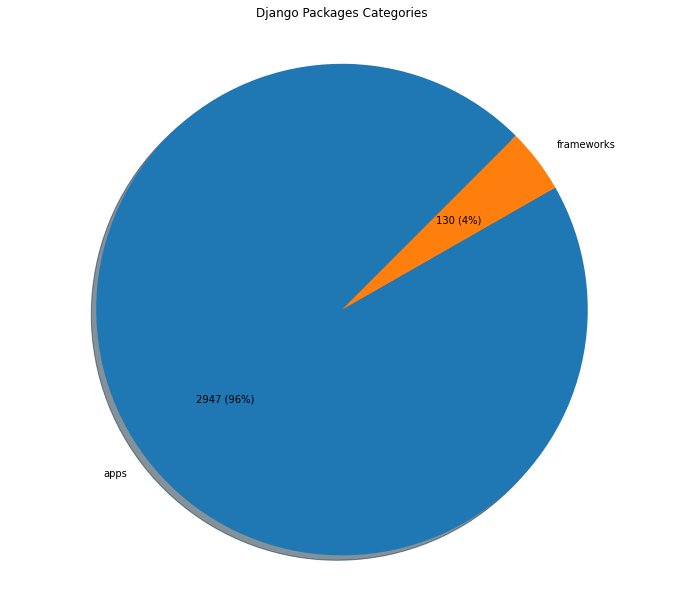

In [8]:
def get_pie_label(p, total):
    absolute = '{:.0f}'.format(p * total / 100)
    percentage = '{0:.0%}'.format(p/100.0)

    return '{} ({})'.format(absolute, percentage)

fig, ax = plt.subplots(figsize=(12, 10))
fig.set_facecolor('white')

categories = 'apps', 'frameworks'

sizes = [
    len(df[df['dp_category'] == categories[0]]),
    len(df[df['dp_category'] == categories[1]]),    
]

ax.pie(sizes, labels=categories, autopct=lambda p: get_pie_label(p, len(df)), shadow=True, startangle=45)
ax.axis('equal')
ax.set_title('Django Packages Categories\n')

plt.show()

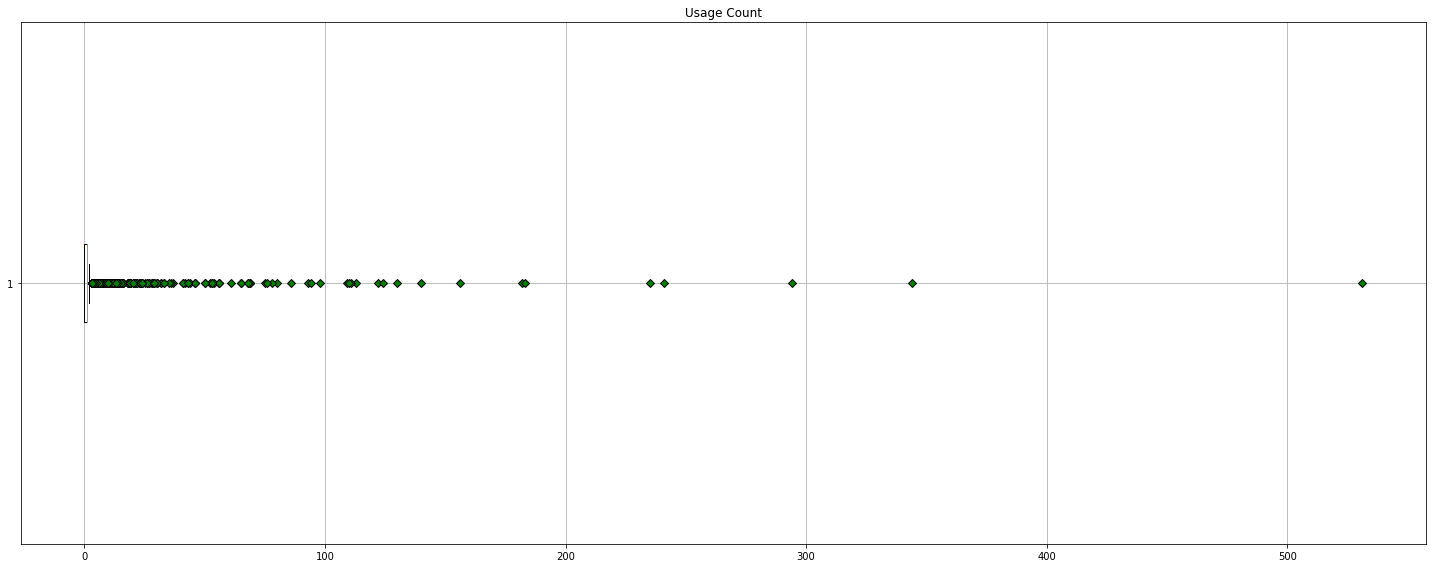

In [9]:
fig, ax = plt.subplots(figsize=(20, 8))

usage_count = df['dp_usage_count'].values

ax.boxplot(usage_count, flierprops=dict(markerfacecolor='g', marker='D'), vert=False)
ax.set_title('Usage Count')

plt.tight_layout()
plt.grid()

plt.show()

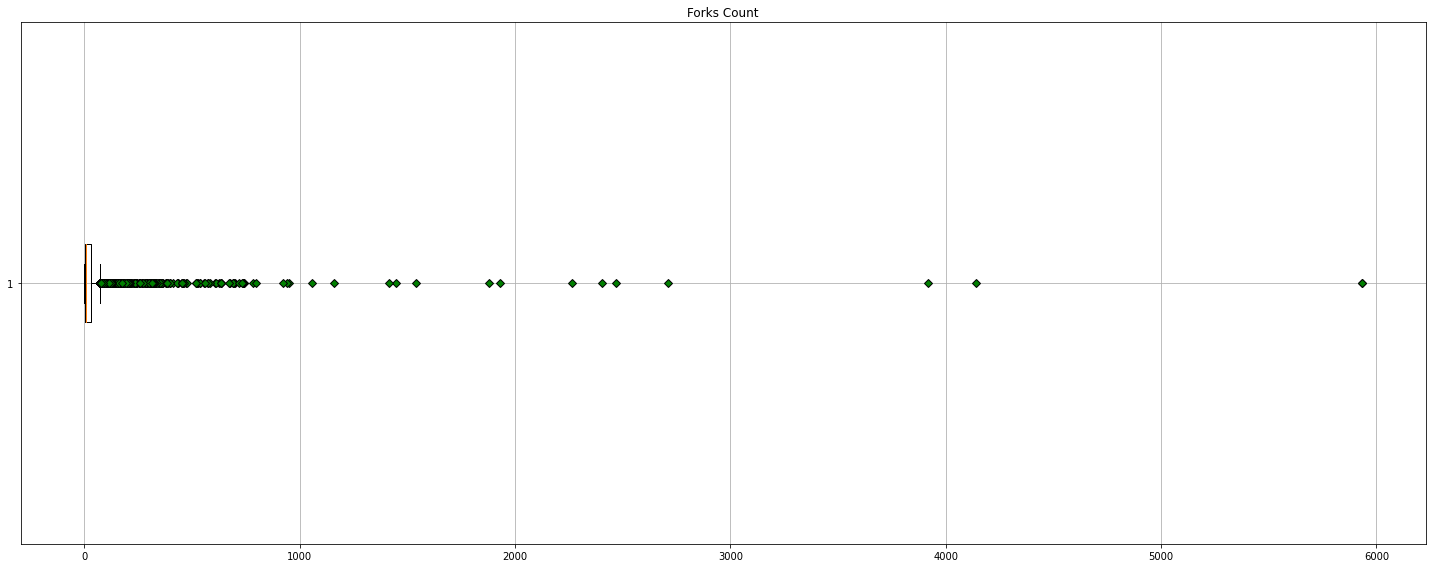

In [10]:
fig, ax = plt.subplots(figsize=(20, 8))

repo_forks = df['repo_forks'].values

ax.boxplot(repo_forks, flierprops=dict(markerfacecolor='g', marker='D'), vert=False)
ax.set_title('Forks Count')

plt.tight_layout()
plt.grid()

plt.show()

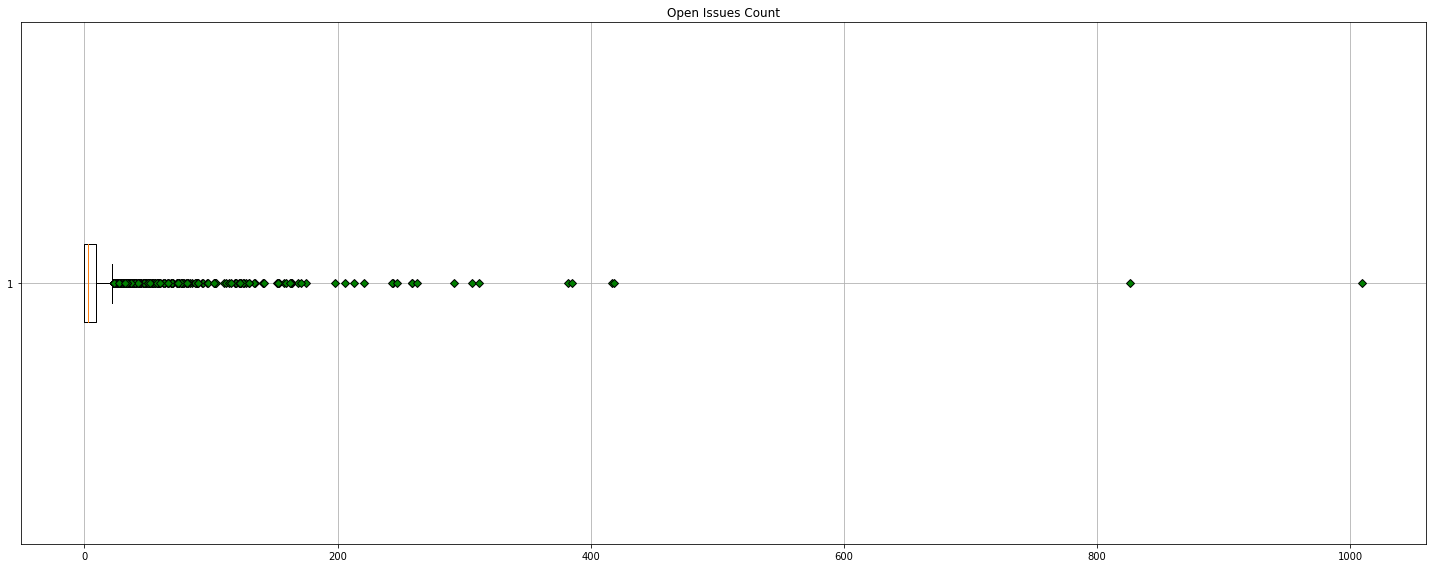

In [11]:
fig, ax = plt.subplots(figsize=(20, 8))

open_issues = df['repo_open_issues'].values

ax.boxplot(open_issues, flierprops=dict(markerfacecolor='g', marker='D'), vert=False)
ax.set_title('Open Issues Count')

plt.tight_layout()
plt.grid()

plt.show()

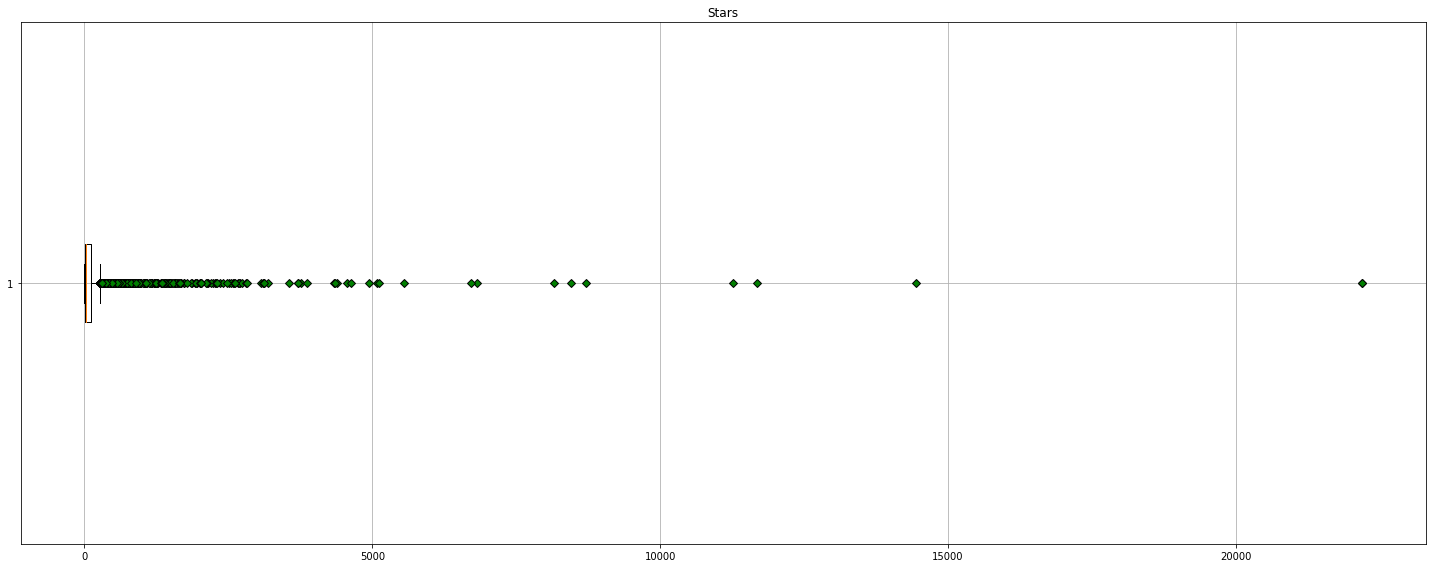

In [12]:
fig, ax = plt.subplots(figsize=(20, 8))

repo_stars = df['repo_stars'].values

ax.boxplot(repo_stars, flierprops=dict(markerfacecolor='g', marker='D'), vert=False)
ax.set_title('Stars')

plt.tight_layout()
plt.grid()

plt.show()